[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


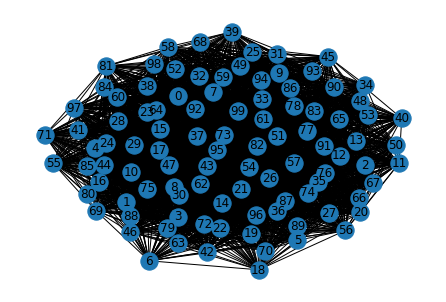

In [ ]:
#creating graph using networkx
import networkx as nx
import math
import random
import datetime
import matplotlib.pyplot as plt
seed=10         # seed the graph dependableness
c=100
G= nx.gnp_random_graph (c,.6, seed=seed )
print ( G.nodes() )
nx.draw(G,with_labels=True)

In [ ]:
#Checking the graph integration.
nx.is_connected(G)

True

In [ ]:
#Adding weights to the edges to the generated graph.
for (u, v) in G.edges():
    weights=G.edges[u,v]['weight'] = random.randint(1,20)    # assigning random weights to edges
    #print(u,v,weights)

In [ ]:
#Represent the load factor
load_factor={
 "8 am"	:1.0,"9 am": 0.95,"10 am":	0.9,"11 am": 0.9,"12 noon":	0.9,"1 pm":	0.9,"2 pm":	0.95,"3 pm": 0.95,"4 pm":0.9,"5pm":	1.0,"6 pm":1.0,"7 pm":0.85,"8 pm":0.7,"9 pm":	0.6,
"10 pm":0.45,"11 pm":	0.3,"12 am":	0.1,"1 am": 0.1,"2 am":	0.1,"3 am":	0.15,"4 am":	0.25,"5 am":0.3,"6 am":	0.65,"7 am"	:0.85}
t={ "8 am"	:8,"9 am": 9,"10 am":	10,"11 am": 11,"12 noon":	12,"1 pm":	1,"2 pm":	2,"3 pm": 3,"4 pm":4,"5pm":	5,"6 pm":6,"7 pm":7,"8 pm":8,"9 pm":	9,
"10 pm":10,"11 pm":	11,"12 am":	12,"1 am": 1,"2 am":	2,"3 am":	3,"4 am":	4,"5 am":5,"6 am":	6,"7 am"	:7 }
def Show_graph_with_edges(g):
  l_ink = [(u, v) for (u, v, d) in g.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(g)
  nx.draw_networkx_nodes(g, pos, node_size=1200, node_color='lightblue',
  linewidths=0.25)
  nx.draw_networkx_edges(g, pos, edgelist=l_ink, width=4)
# node labels
  nx.draw_networkx_labels(g, pos, font_size=20, font_family="sans-serif")
# label weight edes
  label_edge = nx.get_edge_attributes(g, "weight")
  nx.draw_networkx_edge_labels(g, pos, label_edge)
  plt.show()
def normpdf(x, mean=0, sd=0.125):
    variance = float(sd)**2
    denom = (2*math.pi*variance)**.5
    num_ber = math.exp(-(float(x)-float(mean))**2/(2*variance))
    return num_ber/denom
def traffic_update(time,g):
 base_level=load_factor[time]
 p=normpdf(base_level)
 print("Load Factor: ",base_level)
 print("time: ",time)
 factor=base_level*p*t[time]
 temp=int(factor)
 while(temp==0):
   factor*=10
   temp=int(factor)
 for (u, v) in g.edges():
   temp=g.get_edge_data(u,v,default=-1)
   g.edges[u,v]['weight'] = temp['weight']+factor
 return g
def path(g,start,end):
  return nx.shortest_path(g,start,end,weight='weight',method='dijkstra')
def path_length(g,start,end):
  return nx.dijkstra_path_length(g,start,end)

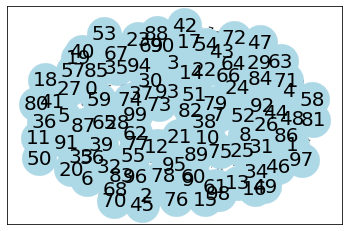

In [ ]:
Show_graph_with_edges(G)

In [ ]:
#Running
#start at time : 8 am
Tr ={}
j_time={}
x=0 # travel count
time="8 am"
total_distance=0
value= random.randint(1,100)
starting_time= datetime.datetime.now()
for i in range(0,value):
  if(i==0):
    time="8 am"
    #Creating travellars
    for j in range(0,10):
      Tr[x]={"start":random.randint(0,c-1),"end":random.randint(0,c-1),"Is_moving":False,"distance":0,"dist":0}
      j_time[x]=0
      x+=1
    for travellar in  list(Tr.keys()):
      if Tr[travellar]["start"]==Tr[travellar]["end"]:
        del Tr[travellar]
        continue
      if Tr[travellar]["Is_moving"]==False:
        temp=path(G,Tr[travellar]["dist"],Tr[travellar]["end"])
        if len(temp)==1:
          del Tr[travellar]
          continue
        distance=path_length(G,Tr[travellar]["dist"],Tr[travellar]["end"])
        Tr[travellar]["Is_moving"]=True
        print("temp:", temp)
        Tr[travellar]["dist"]=temp[1]
        Tr[travellar]["distance"]=distance
        j_time[travellar]+=distance
        total_distance+=distance
  if(i%15==0):
    # Update time vairable
    ''' '''

    ''' '''
    temp=time.split(" ")
    new_value=float(temp[0])+0.15
    #print("checking:", int((new_value*10)%10))
    if int((new_value*10)%10)==6 or int((new_value*10)%10)==5 :
     # print("update",new_value)
      if int(new_value)==12 and temp[1]=="pm":
        time="1 am"
      elif int(new_value)==12 and temp[1]=="am":
        time="1 pm"
      else:
        newtime=int(new_value)+1
        time=str(int(newtime))+" "+temp[1]
      #print("Updated ::::",time)
    else:
      time=str(new_value)+" "+temp[1]
      #print("after time",time)
      #print(time)
      #val=int(time.split(" ")[0])
      #print(val)
      newtime=str(int(float(time.split(" ")[0])))+" "+time.split(" ")[1]
      time=newtime
      print(load_factor[newtime])
    print(time)
    G=traffic_update(time,G)
    for j in range(0,10):
      Tr[x]={"start":random.randint(0,c-1),"end":random.randint(0,c-1),"Is_moving":False,"distance":0,"dist":0}
      j_time[x]=0
      x+=1
    for travellar in  list(Tr.keys()):
      print(Tr[travellar]["Is_moving"])
      if Tr[travellar]["Is_moving"]==False:
        temp=path(G,Tr[travellar]["start"],Tr[travellar]["end"])
        if len(temp)==1:
          del Tr[travellar]
          continue
        distance=path_length(G,Tr[travellar]["dist"],Tr[travellar]["end"])
        Tr[travellar]["Is_moving"]=True
        Tr[travellar]["dist"]=temp[1]
        Tr[travellar]["distance"]=distance
        j_time[travellar]+=distance
        total_distance+=distance
    G=traffic_update(time,G)
    for travellar in  list(Tr.keys()):
      if Tr[travellar]["Is_moving"]==False:
        temp=path(G,Tr[travellar]["start"],Tr[travellar]["end"])
        if len(temp)==1:
          del Tr[travellar]
          continue
        distance=path_length(G,Tr[travellar]["dist"],Tr[travellar]["end"])
        Tr[travellar]["Is_moving"]=True
        Tr[travellar]["dist"]=temp[1]
        Tr[travellar]["distance"]=distance
        j_time[travellar]+=distance
        total_distance+=distance
  #update the distance travelled by travellars
  for travellar in  list(Tr.keys()):
    if Tr[travellar]["distance"]==0 and Tr[travellar]["dist"]!=Tr[travellar]["end"]:
      Tr[travellar]["start"]=Tr[travellar]["dist"]
      #print("Start:",Tr[travellar]["start"],"::: end",Travellars[travellar]["end"])
      temp=path(G,Tr[travellar]["start"],Tr[travellar]["end"])
      if len(temp)==1:
          del Tr[travellar]
          continue
      distance=path_length(G,Tr[travellar]["start"],Tr[travellar]["end"])
      Tr[travellar]["dist"]=temp[1]
      total_distance+=distance
      Tr[travellar]["Is_moving"]=True
      #print("moving to next node")
  for travellar in  list(Tr.keys()):
    if(Tr[travellar]["distance"]==0):
      Tr[travellar]["Is_moving"]=False
    Tr[travellar]["distance"]-=1
    if(Tr[travellar]["dist"]==Tr[travellar]["end"]):
      del Tr[travellar]
end_time= datetime.datetime.now()
print("Time taken in seconds: ", end_time-starting_time)
print("Total distance travelled by all Tr :",total_distance)
print("Indivual  Journey Time\n",j_time)

temp: [0, 56, 13, 22]
temp: [0, 42, 94, 5]
temp: [0, 56, 60, 59]
temp: [0, 10, 12, 73]
temp: [0, 39, 86]
temp: [0, 39, 17, 81]
temp: [0, 10, 12]
temp: [0, 74, 53, 37]
temp: [0, 2]
temp: [0, 39, 38]
1.0
8 am
Load Factor:  1.0
time:  8 am
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
Load Factor:  1.0
time:  8 am
1.0
8 am
Load Factor:  1.0
time:  8 am
False
False
False
False
False
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
Load Factor:  1.0
time:  8 am
1.0
8 am
Load Factor:  1.0
time:  8 am
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
Load Factor:  1.0
time:  8 am
Time taken in seconds:  0:00:00.174294
Total distance travelled by all Tr : 821.9205473822776
Indivual  Journey Time
 {0: 14.700360480390835, 1: 4, 2: 14.700360480390835, 3: 15.700360480390835, 4: 3, 5: 14.70036048039083